In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as TTS
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as SS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import accuracy_score as a_s, precision_score as p_s, confusion_matrix as c_m, classification_report as c_r
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import roc_auc_score as RAS
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
df = pd.read_csv("train.csv")


In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
print("No.of duplicate records is ",df.duplicated().sum())

No.of duplicate records is  0


In [6]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [7]:
df.groupby('churn_risk_score').size()

churn_risk_score
-1     1163
 1     2652
 2     2741
 3    10424
 4    10185
 5     9827
dtype: int64

In [8]:
df = df[df.churn_risk_score != -1]

In [9]:
df.groupby('churn_risk_score').size()

churn_risk_score
1     2652
2     2741
3    10424
4    10185
5     9827
dtype: int64

In [10]:
for column in df.columns:
    print(f"{column}: ")
    print("")
    print(df[column].unique())
    print("")

customer_id: 

['fffe4300490044003600300030003800' 'fffe43004900440032003100300035003700'
 'fffe4300490044003100390032003600' ... 'fffe4300490044003500330034003100'
 'fffe43004900440031003200390039003000'
 'fffe43004900440033003600340034003200']

Name: 

['Pattie Morrisey' 'Traci Peery' 'Merideth Mcmeen' ... 'Luciana Kinch'
 'Tawana Ardoin' 'Verlene Beaulieu']

age: 

[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 43 29 10 20
 61 17 12 52 26 49 24 22 36 58 41 50 38 35 48 28 53 55 59 47 54 62 51 56
 23 27 14 46 15 64 63]

gender: 

['F' 'M' 'Unknown']

security_no: 

['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']

region_category: 

['Village' 'City' 'Town' nan]

membership_category: 

['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

joining_date: 

['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']

joined_through_referral: 

['No' '?' 'Yes']

referr

In [11]:
df['gender'] = df['gender'].map({'F':1, 'M':0, 'Unknown':1})
df['region_category'] = df['region_category'].map({'Village':1, 'City':2, 'Town':3})
df['membership_category'] = df['membership_category'].map({'Platinum Membership':1, 'Premium Membership':2, 'No Membership':3,'Gold Membership':4, 'Silver Membership':5, 'Basic Membership':6})
df['joined_through_referral'] = df['joined_through_referral'].map({'Yes':1, 'No':0, '?':1})
df['preferred_offer_types'] = df['preferred_offer_types'].map({'Gift Vouchers/Coupons':1, 'Credit/Debit Card Offers':2, 'Without Offers':3})
df['medium_of_operation'] = df['medium_of_operation'].map({'Desktop':1, 'Smartphone':2, 'Both':3, '?':3})
df['internet_option'] = df['internet_option'].map({'Wi-Fi':1, 'Mobile_Data':2,'Fiber_Optic':3})
df['used_special_discount'] = df['used_special_discount'].map({'Yes':1, 'No':0})
df['offer_application_preference'] = df['offer_application_preference'].map({'Yes':1, 'No':0})
df['past_complaint'] = df['past_complaint'].map({'Yes':1, 'No':0})
df['complaint_status'] = df['complaint_status'].map({'Not Applicable':1, 'Solved':2, 'Solved in Follow-up':3, 'Unsolved':4, 'No Information Available':5})
df['feedback'] = df['feedback'].map({'Products always in Stock':1, 'Quality Customer Care':2, 'Poor Website':3, 'No reason specified':4, 'Poor Product Quality':5, 'Poor Customer Service':6, 'Too many ads':7, 'User Friendly Website':8, 'Reasonable Price':9    })


In [12]:
df['region_category']=df['region_category'].replace(np.nan,0)
df['preferred_offer_types']=df['preferred_offer_types'].replace(np.nan,0)

In [13]:
for column in df.columns:
    print(f"{column}: ")
    print("")
    print(df[column].unique())
    print("")

customer_id: 

['fffe4300490044003600300030003800' 'fffe43004900440032003100300035003700'
 'fffe4300490044003100390032003600' ... 'fffe4300490044003500330034003100'
 'fffe43004900440031003200390039003000'
 'fffe43004900440033003600340034003200']

Name: 

['Pattie Morrisey' 'Traci Peery' 'Merideth Mcmeen' ... 'Luciana Kinch'
 'Tawana Ardoin' 'Verlene Beaulieu']

age: 

[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 43 29 10 20
 61 17 12 52 26 49 24 22 36 58 41 50 38 35 48 28 53 55 59 47 54 62 51 56
 23 27 14 46 15 64 63]

gender: 

[1 0]

security_no: 

['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']

region_category: 

[1. 2. 3. 0.]

membership_category: 

[1 2 3 4 5 6]

joining_date: 

['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']

joined_through_referral: 

[0 1]

referral_id: 

['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']

preferred_offer_types: 

[1. 2. 3. 0.]

medium_of_operation: 

[

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   35829 non-null  object 
 1   Name                          35829 non-null  object 
 2   age                           35829 non-null  int64  
 3   gender                        35829 non-null  int64  
 4   security_no                   35829 non-null  object 
 5   region_category               35829 non-null  float64
 6   membership_category           35829 non-null  int64  
 7   joining_date                  35829 non-null  object 
 8   joined_through_referral       35829 non-null  int64  
 9   referral_id                   35829 non-null  object 
 10  preferred_offer_types         35829 non-null  float64
 11  medium_of_operation           35829 non-null  int64  
 12  internet_option               35829 non-null  int64  
 13  l

In [15]:
df = df.loc[:,[ 'age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
              'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'used_special_discount',
              'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  int64  
 2   region_category               35829 non-null  float64
 3   membership_category           35829 non-null  int64  
 4   joined_through_referral       35829 non-null  int64  
 5   preferred_offer_types         35829 non-null  float64
 6   medium_of_operation           35829 non-null  int64  
 7   internet_option               35829 non-null  int64  
 8   days_since_last_login         35829 non-null  int64  
 9   avg_time_spent                35829 non-null  float64
 10  avg_transaction_value         35829 non-null  float64
 11  used_special_discount         35829 non-null  int64  
 12  offer_application_preference  35829 non-null  int64  
 13  p

In [17]:
df['avg_time_spent'].fillna(-1)
df['avg_transaction_value'].fillna(-1)

0        53005.25
1        12838.38
2        21027.00
3        25239.56
4        24483.66
           ...   
36987    27277.68
36988    11069.71
36989    38127.56
36990     2378.86
36991     2189.68
Name: avg_transaction_value, Length: 35829, dtype: float64

In [18]:
df['avg_time_spent'] = df['avg_time_spent'].astype(int)
df['avg_transaction_value'] = df['avg_transaction_value'].astype(int)
df['preferred_offer_types'] = df['preferred_offer_types'].astype(int)
df['region_category'] = df['region_category'].astype(int)

In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.preprocessing import MinMaxScaler
minmaxer = MinMaxScaler(feature_range=(1,10))
minmaxed_x = minmaxer.fit_transform(X)

In [21]:
from sklearn.feature_selection import chi2
chi_value,pval = chi2(minmaxed_x,y)
pval = np.round(pval,decimals=3)
with np.printoptions(precision=4,suppress=True):
 print(pd.DataFrame(np.concatenate((chi_value.reshape(-1,1),pval.reshape(-1,1)),axis=1),
 index = df.columns[:-1],columns=['chi2 val','pval']))

                                  chi2 val   pval
age                               8.354110  0.079
gender                            7.060005  0.133
region_category                  25.555806  0.000
membership_category           13363.135125  0.000
joined_through_referral         499.193499  0.000
preferred_offer_types           248.144472  0.000
medium_of_operation              15.600467  0.004
internet_option                  16.078900  0.003
days_since_last_login             4.492119  0.343
avg_time_spent                    2.853515  0.583
avg_transaction_value          7069.642020  0.000
used_special_discount            19.139087  0.001
offer_application_preference    323.865375  0.000
past_complaint                   32.359209  0.000
complaint_status                 17.022219  0.002
feedback                          2.838089  0.585


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           35829 non-null  int64
 1   gender                        35829 non-null  int64
 2   region_category               35829 non-null  int32
 3   membership_category           35829 non-null  int64
 4   joined_through_referral       35829 non-null  int64
 5   preferred_offer_types         35829 non-null  int32
 6   medium_of_operation           35829 non-null  int64
 7   internet_option               35829 non-null  int64
 8   days_since_last_login         35829 non-null  int64
 9   avg_time_spent                35829 non-null  int32
 10  avg_transaction_value         35829 non-null  int32
 11  used_special_discount         35829 non-null  int64
 12  offer_application_preference  35829 non-null  int64
 13  past_complaint                3

In [89]:
X = df.drop(columns=['region_category','feedback','avg_time_spent','churn_risk_score']).values
#X = df.drop(columns=['region_category','avg_transaction_value','preferred_offer_types','feedback','avg_time_spent','churn_risk_score']).values

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.33)

***Random Forest***

In [92]:
rf = RFC(max_depth=5, random_state=0)
clf4 = rf.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)

In [93]:
print("\n1. Random Forest Classifier\n")
print('\n CLASSIFICATION REPORT\n', c_r(y_test, y_pred4,zero_division=1))
print('\n CONFUSION MATRIX\n', c_m(y_test, y_pred4))
print('\n ACCURACY SCORE  : ', a_s(y_test, y_pred4))
print('\n PRECISION SCORE : ', p_s(y_test, y_pred4, average='macro', zero_division = 1))


1. Random Forest Classifier


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           1       0.55      0.46      0.50       881
           2       0.76      0.17      0.28       941
           3       0.77      0.51      0.61      3418
           4       0.44      0.51      0.47      3377
           5       0.65      0.95      0.77      3207

    accuracy                           0.60     11824
   macro avg       0.63      0.52      0.53     11824
weighted avg       0.63      0.60      0.58     11824


 CONFUSION MATRIX
 [[ 405   49  298  129    0]
 [ 338  159  225  219    0]
 [   0    0 1744 1674    0]
 [   0    0    0 1725 1652]
 [   0    0    0  154 3053]]

 ACCURACY SCORE  :  0.5992895805142084

 PRECISION SCORE :  0.6339775335172018


***KNN***

In [94]:
knn = KNN(n_neighbors = 5, metric = 'minkowski', p = 2)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [95]:
print("\n2. KNN Classifier\n")
print('\n CLASSIFICATION REPORT\n', c_r(y_test, y_pred,zero_division=1))
print('\n CONFUSION MATRIX\n', c_m(y_test, y_pred))
print('\n ACCURACY SCORE  : ', a_s(y_test, y_pred))
print('\n PRECISION SCORE : ', p_s(y_test, y_pred, average='macro', zero_division = 1))


2. KNN Classifier


 CLASSIFICATION REPORT
               precision    recall  f1-score   support

           1       0.36      0.28      0.32       881
           2       0.38      0.20      0.26       941
           3       0.44      0.56      0.49      3418
           4       0.37      0.42      0.40      3377
           5       0.46      0.35      0.40      3207

    accuracy                           0.42     11824
   macro avg       0.40      0.36      0.37     11824
weighted avg       0.42      0.42      0.41     11824


 CONFUSION MATRIX
 [[ 247  169  302   98   65]
 [ 204  185  299  178   75]
 [ 139   76 1922  899  382]
 [  54   34 1050 1427  812]
 [  37   23  782 1232 1133]]

 ACCURACY SCORE  :  0.415595399188092

 PRECISION SCORE :  0.4030737819712213


***Model Optimization***

RF   : 0.601250 (0.015797)
KNN   : 0.417163 (0.006175)


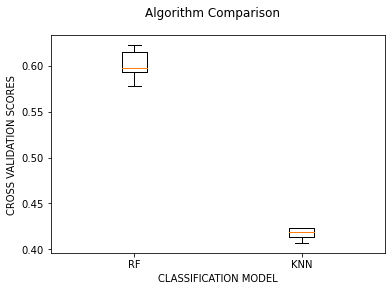

In [96]:
from sklearn import model_selection
models = []
models.append(('RF', rf))
models.append(('KNN', knn))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s   : %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel("CLASSIFICATION MODEL")
plt.ylabel("CROSS VALIDATION SCORES")
ax.set_xticklabels(names)
plt.show()

***Test Set***

In [123]:
df1 = pd.read_csv("test.csv")
df1.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [126]:
ID = df1.iloc[:,0]
ID

0        fffe43004900440031003700300030003400
1        fffe43004900440031003900370037003300
2        fffe43004900440034003800360037003000
3        fffe43004900440036003200370033003400
4        fffe43004900440035003000370031003900
                         ...                 
19914    fffe43004900440035003600330037003800
19915    fffe43004900440032003900370037003100
19916    fffe43004900440036003100310036003700
19917    fffe43004900440034003200330033003600
19918    fffe43004900440036003200340030003100
Name: customer_id, Length: 19919, dtype: object

In [98]:
df1.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [99]:
print("No.of duplicate records is ",df.duplicated().sum())

No.of duplicate records is  0


In [100]:
for column in df.columns:
    print(f"{column}: ")
    print("")
    print(df[column].unique())
    print("")

age: 

[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 43 29 10 20
 61 17 12 52 26 49 24 22 36 58 41 50 38 35 48 28 53 55 59 47 54 62 51 56
 23 27 14 46 15 64 63]

gender: 

[1 0]

region_category: 

[1 2 3 0]

membership_category: 

[1 2 3 4 5 6]

joined_through_referral: 

[0 1]

preferred_offer_types: 

[1 2 3 0]

medium_of_operation: 

[3 1 2]

internet_option: 

[1 2 3]

days_since_last_login: 

[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]

avg_time_spent: 

[ 300  306  516 ... -490 -347 1290]

avg_transaction_value: 

[53005 12838 21027 ... 27277 11069 38127]

used_special_discount: 

[1 0]

offer_application_preference: 

[1 0]

past_complaint: 

[0 1]

complaint_status: 

[1 2 3 4 5]

feedback: 

[1 2 3 4 5 6 7 8 9]

churn_risk_score: 

[2 1 5 3 4]



In [101]:
df1['gender'] = df1['gender'].map({'F':1, 'M':0, 'Unknown':1})
df1['region_category'] = df1['region_category'].map({'Village':1, 'City':2, 'Town':3})
df1['membership_category'] = df1['membership_category'].map({'Platinum Membership':1, 'Premium Membership':2, 'No Membership':3,'Gold Membership':4, 'Silver Membership':5, 'Basic Membership':6})
df1['joined_through_referral'] = df1['joined_through_referral'].map({'Yes':1, 'No':0, '?':1})
df1['preferred_offer_types'] = df1['preferred_offer_types'].map({'Gift Vouchers/Coupons':1, 'Credit/Debit Card Offers':2, 'Without Offers':3})
df1['medium_of_operation'] = df1['medium_of_operation'].map({'Desktop':1, 'Smartphone':2, 'Both':3, '?':3})
df1['internet_option'] = df1['internet_option'].map({'Wi-Fi':1, 'Mobile_Data':2,'Fiber_Optic':3})
df1['used_special_discount'] = df1['used_special_discount'].map({'Yes':1, 'No':0})
df1['offer_application_preference'] = df1['offer_application_preference'].map({'Yes':1, 'No':0})
df1['past_complaint'] = df1['past_complaint'].map({'Yes':1, 'No':0})
df1['complaint_status'] = df1['complaint_status'].map({'Not Applicable':1, 'Solved':2, 'Solved in Follow-up':3, 'Unsolved':4, 'No Information Available':5})
df1['feedback'] = df1['feedback'].map({'Products always in Stock':1, 'Quality Customer Care':2, 'Poor Website':3, 'No reason specified':4, 'Poor Product Quality':5, 'Poor Customer Service':6, 'Too many ads':7, 'User Friendly Website':8, 'Reasonable Price':9    })


In [102]:
df1['region_category']=df1['region_category'].replace(np.nan,0)
df1['preferred_offer_types']=df1['preferred_offer_types'].replace(np.nan,0)

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  int64  
 4   security_no                   19919 non-null  object 
 5   region_category               19919 non-null  float64
 6   membership_category           19919 non-null  int64  
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  int64  
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19919 non-null  float64
 11  medium_of_operation           19919 non-null  int64  
 12  internet_option               19919 non-null  int64  
 13  l

In [104]:
df1 = df1.loc[:,[ 'age', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation',
              'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'used_special_discount',
              'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']]

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           19919 non-null  int64  
 1   gender                        19919 non-null  int64  
 2   region_category               19919 non-null  float64
 3   membership_category           19919 non-null  int64  
 4   joined_through_referral       19919 non-null  int64  
 5   preferred_offer_types         19919 non-null  float64
 6   medium_of_operation           19919 non-null  int64  
 7   internet_option               19919 non-null  int64  
 8   days_since_last_login         19919 non-null  int64  
 9   avg_time_spent                19919 non-null  float64
 10  avg_transaction_value         19919 non-null  float64
 11  used_special_discount         19919 non-null  int64  
 12  offer_application_preference  19919 non-null  int64  
 13  p

In [106]:
df1['avg_time_spent'].fillna(-1)
df1['avg_transaction_value'].fillna(-1)

0        40721.44
1         9644.40
2         3693.25
3        36809.56
4        40675.86
           ...   
19914    46279.35
19915    23466.26
19916    17903.75
19917    14057.09
19918    36786.44
Name: avg_transaction_value, Length: 19919, dtype: float64

In [110]:
X1 = df1.drop(columns=['region_category','feedback','avg_time_spent']).values
#X1 = df1.drop(columns=['region_category','avg_transaction_value','preferred_offer_types','feedback','avg_time_spent']).values

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [112]:
y_pred_RF = clf4.predict(X1)

In [127]:
df=pd.DataFrame(dict(customer_id = ID , churn_risk_score = y_pred_RF)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('RFresult.csv', index=False)